In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import xarray as xr

from EC_Processing_Engine import *

Within teton running on one instance, you can expect between 2 and 3 iterations/second when combining two sites worth of data. A year of such data could take from 1-2 hours to process

In [2]:
converted_dirs = ["/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Good/Chimney/EC Processing/BB-NF/Fast/17m/Converted"]
met_dirs = ["/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Good/Chimney/Data/BB-NF/EC/17m"]
metadata_fn = "/Volumes/TempData/Bretfeld Mario/Chimney/Site Information/Changelog_Alex_fieldnotes.xlsx"
file_length = 30
acq_freq = 10
start_time = "2021-03-12 00:00"
end_time = "2021-03-12 01:00"
site_names = ["NF17"]
out_dir = "/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Good/Chimney/EC Processing/BB-NF/Fast/17m/Standardized"

In [3]:
tester = ec_processing_engine(converted_dirs, met_dirs, file_length, acq_freq, start_time, end_time, site_names, out_dir)

In [4]:
tester.combine_slow_files()

In [5]:
biomet = pd.read_csv("/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-NF/Fast/17m/Standardized/biomet.csv", skiprows=[1], index_col=False).set_index('TIMESTAMP_1')

<AxesSubplot:xlabel='TIMESTAMP_1'>

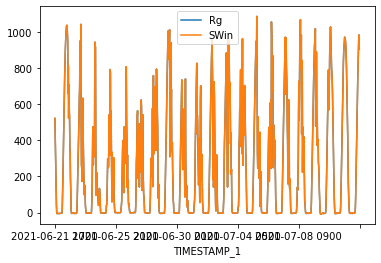

In [6]:
biomet[['Rg', 'SWin']].plot()

In [2]:
converted_dirs = ["/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-NF/Fast/17m/Converted",
                  "/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-NF/Fast/3m/Converted",
                  "/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-SF/Fast/4m/Converted",
                 "/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-SF/Fast/7m/Converted",
                 "/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-UF/Fast/3m/Converted"]
metadata_fn = "/Volumes/TempData/Bretfeld Mario/Chimney/Site Information/Changelog_Alex_fieldnotes.xlsx"
file_length = 30
acq_freq = 10
start_time = "2021-03-12 00:00"
end_time = "2021-03-12 01:00"
site_names = ["NF17", "NF3", "SF4", "SF7", "UF3"]#, "NF3"]
out_dir = "/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/Combined/Fast/Standardized"

In [3]:
tester = fast_processing_engine(converted_dirs, file_length, acq_freq, start_time, end_time, site_names, out_dir)
dat = tester.process_fast_files()


exists
Processing data from...
Site NF17 in /Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-NF/Fast/17m/Converted
Site NF3 in /Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-NF/Fast/3m/Converted
Site SF4 in /Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-SF/Fast/4m/Converted
Site SF7 in /Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-SF/Fast/7m/Converted
Site UF3 in /Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/BB-UF/Fast/3m/Converted
Outputting data to...
/Volumes/TempData/Bretfeld Mario/Chimney-Park-Reprocessing-Sandbox/Alex Work/Bad/Chimney/EC Processing/Combined/Fast/Standardized


Press Enter to confirm 


INFO    423    searching for files in range 2021-03-12 00:00:00...2021-03-12 01:00:00
INFO    428    Found 935 files for site NF17:
INFO    431    TOA5_9809.CP_BBNF17m_10Hz227_2021_03_27_1430.dat  ...  TOA5_9809.CP_BBNF17m_10Hz227_2021_03_27_0930.dat
INFO    428    Found 1142 files for site NF3:
INFO    431    TOA5_10365.CP_EC_BBNF3m_10Hz665_2021_03_25_0900.dat  ...  TOA5_10365.CP_EC_BBNF3m_10Hz653_2021_03_13_1000.dat
INFO    428    Found 1140 files for site SF4:
INFO    431    TOA5_2992.CPk_BBSF4m_10Hz907_2021_03_21_2030.dat  ...  TOA5_2992.CPk_BBSF4m_10Hz896_2021_03_10_1500.dat
INFO    428    Found 1140 files for site SF7:
INFO    431    TOA5_9810.CPk_BBSF7m_10Hz724_2021_03_26_0100.dat  ...  TOA5_9810.CPk_BBSF7m_10Hz727_2021_03_29_1030.dat
INFO    428    Found 2375 files for site UF3:
INFO    431    TOA5_2991.CPk_BBUF3m_10Hz766_2021_03_26_1730.dat  ...  TOA5_2991.CPk_BBUF3m_10Hz725_2021_02_10_0930.dat
Processing 2021-03-12 01:00:00: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


In [12]:
tester.summary.to_netcdf('./summary_short.nc')
pd.read_csv('./new_pandas')

,SITE,STAT,fns,Ux,Uy,Uz,Ts,CO2,H2O,PCELL,TCELL,flag
0,NF17,Avg,/Volumes/TempData/Bretfeld Mario/Chimney-Park-...,-0.733115,0.101249,-0.015305,-7.131406,640.822768,-0.494650,72.703399,NaN,NaN
1,NF17,Avg,/Volumes/TempData/Bretfeld Mario/Chimney-Park-...,-0.750695,-0.276719,-0.034605,-6.571875,558.319505,0.707428,72.696959,NaN,NaN


,SITE,STAT,fns,Ux,Uy,Uz,Ts,CO2,H2O,PCELL,TCELL,flag
TIMESTAMP,,,,,,,,,,,,
2021-03-12 00:00:00,NF17,Avg,/Volumes/TempData/Bretfeld Mario/Chimney-Park-...,-0.733115,0.101249,-0.015305,-7.131406,640.822768,-0.494650,72.703399,NaN,NaN
2021-03-12 00:30:00,NF17,Avg,/Volumes/TempData/Bretfeld Mario/Chimney-Park-...,-0.644177,0.030589,-0.033387,-6.798527,642.226673,1.175415,72.701570,NaN,NaN
2021-03-12 01:00:00,NF17,Avg,/Volumes/TempData/Bretfeld Mario/Chimney-Park-...,-0.750695,-0.276719,-0.034605,-6.571875,558.319505,0.707428,72.696959,NaN,NaN


In [3]:
def spectrum(dat, tester):
        
        for site in ['NF17']:#tester.site_info:
            # select the columns W, Ts, CO2, H2O
            cosp_cols = []
            for col in tester.site_info[site]['final_header']:
                pref, suff = col.split('_')[0], col.split('_')[-1]
                if pref in ['Uz', 'CO2', 'H2O', 'Ts'] and suff == site:
                    cosp_cols.append(col)
                if pref == 'Uz' and suff == site:
                    W_icol, W_col = len(cosp_cols) - 1, col
            
            # compute fft and scale by 1/n, in parallel. Remove the mean (element 0)
            cosp = fft.fft(dat[cosp_cols], axis=0, norm='forward', workers=-1)[1:]
            # save the vertical windspeed column as a series
            W = cosp[:, W_icol][:, None]
            
            # compute the cospectrum of each column with vertical wind speed
            # If X, Y are in the time domain and FX, FY are their fourier-transforms, and f is frequency:
            # Co(X, Y) = Re(FX(f)FY*(f))df, where * is the complex conjugate.
            # If X = Y, then we get the power spectrum of X
            # By the way: we can integrate across frequencies to get the covariance/variance
            # σ^2(X,Y) = ∫Co(X, Y)df
            cosp = ((W*np.conj(cosp)).real)
            
            # we want to bin our cospectra by frequency decade (every power of 10). Range from ~4 months to ~0.01s
            # ogives are just the cumulative abs of cospectra
            # also, we like to scale bin cospectra (not ogives) by f
            f = fft.fftfreq(tester.n_records, d=1/acq_freq)[1:]
            min_freq, max_freq = -9, 20#f[0], f[tester.n_records//2 - 2]
            bin_edges = 10**np.arange(-7, 3, 1.)
            bin_centers = 10**(np.log10(bin_edges[:-1]) + np.diff(np.log10(bin_edges))/2)
            binned_cosp, _, _ = stats.binned_statistic(x=f, values=np.abs(f*cosp.T), bins=bin_edges)
            binned_cosp = binned_cosp.T
            
            ogive = np.nancumsum(np.abs(cosp), axis=0)
            binned_ogives, _, _ = stats.binned_statistic(x=f, values=f*ogive.T, bins=bin_edges)
            binned_ogives = binned_ogives.T
                
            # next: combine ogives and cospectra into a dataset of dimensions (time, site, frequency)
            
            
        return bin_centers, binned_ogives, binned_cosp
            

In [428]:
spectrum(dat, tester)

(array([3.16227766e-07, 3.16227766e-06, 3.16227766e-05, 3.16227766e-04,
        3.16227766e-03, 3.16227766e-02, 3.16227766e-01, 3.16227766e+00,
        3.16227766e+01]),
 array([[           nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan],
        [2.83276147e-08, 1.41702301e-07, 1.17731497e-05, 2.51388811e-06],
        [8.29305819e-06, 4.15662139e-06, 2.00460668e-03, 1.13038799e-04],
        [8.30711697e-04, 1.36762803e-04, 4.64394683e-02, 2.11193944e-03],
        [1.38897393e-02, 1.95596340e-03, 5.44816836e-01, 2.43982106e-02],
        [9.25144154e-02, 1.26072520e-02, 3.19025640e+00, 1.37928468e-01],
        [           nan,            nan,            nan,            nan]]),
 array([[           nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan],
        [     

In [144]:
10*np.ones((18000, 1))*dat

,Ux_CSAT3_NF17,Uy_CSAT3_NF17,Uz_CSAT3_NF17,Ts_CSAT3_NF17,Ux_CSAT3_NF7,Uy_CSAT3_NF7,Uz_CSAT3_NF7,Ts_CSAT3_NF7,CO2_LI7500_NF17,H2O_LI7500_NF17,...,Uy_SON_UF3,Uz_SON_UF3,Ts_SON_UF3,CO2_IRGA_UF3,H2O_IRGA_UF3,PCELL_IRGA_UF3,TCELL_IRGA_UF3,DIAG_SON_UF3,flag_SON_UF3,DIAG_IRGA_UF3
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2021-03-12 01:00:00.100,-16.6950,-5.937500,1.1275,-67.12128,-2.7800,-1.7975,0.7975,-74.52576,6314.455,6.146658,...,-1.984893,-0.381686,-64.54895,65938.33,1194715.0,728.4049,-73.94287,0.0,NaN,8478730.0
2021-03-12 01:00:00.200,-13.8125,-8.230000,1.3625,-66.99127,-3.4925,-1.6825,0.8625,-74.05396,6318.663,6.086419,...,-2.071409,-0.327816,-64.56268,65964.36,1196158.0,728.4109,-73.94287,0.0,NaN,8478730.0
2021-03-12 01:00:00.300,-18.1525,-6.275001,1.8350,-65.89966,-3.8525,-1.7025,0.6950,-74.24927,6315.883,6.137219,...,-2.046681,-0.359823,-64.42810,65948.85,1195804.0,728.4109,-73.94287,0.0,NaN,8478730.0
2021-03-12 01:00:00.400,-16.1225,-1.090000,1.8450,-66.79565,-3.8100,-1.4550,0.8500,-74.62341,6318.475,6.089888,...,-2.206834,-0.378030,-63.76465,65985.48,1191867.0,728.4109,-73.94287,0.0,NaN,8478730.0
2021-03-12 01:00:00.500,-12.0600,-4.585000,-0.6725,-67.00745,-3.7975,-1.7425,0.8500,-74.47723,6317.817,6.170837,...,-1.828216,-0.205122,-64.39026,65970.86,1190228.0,728.4109,-73.94287,0.0,NaN,8478730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12 01:29:59.600,0.0150,0.482500,-0.7100,-65.62256,0.5850,-0.7150,-0.5525,-73.06183,4875.712,42.082250,...,-0.838236,-0.946991,-66.69434,137392.30,105088.4,728.4943,-72.93640,0.0,NaN,8478730.0
2021-03-12 01:29:59.700,0.1625,0.385000,-0.7875,-65.93231,0.6125,-0.8175,-0.4700,-72.65533,4869.953,41.876470,...,-0.811202,-0.930897,-66.58173,137172.00,105542.6,728.4943,-72.93640,0.0,NaN,8478730.0
2021-03-12 01:29:59.800,0.2350,0.460000,-0.8500,-66.46973,0.5075,-0.7950,-0.3225,-72.98065,4875.737,41.868310,...,-0.803161,-0.911405,-66.87256,137333.00,105194.8,728.4943,-72.93640,0.0,NaN,8478730.0


In [119]:
X = (1 - stats.triang.rvs(loc=0, c=0, scale=1, size=10_000))*np.exp(stats.uniform.rvs(loc=0, scale=2*np.pi, size=10_000)*(1j))
Y = (1 - stats.triang.rvs(loc=0, c=0, scale=1, size=10_000))*np.exp(stats.uniform.rvs(loc=0, scale=2*np.pi, size=10_000)*(1j))
(X*np.conj(Y)).sum()

# plt.hist(X.real)
# plt.hist(X.imag)
# plt.hist(Y.real)
# plt.hist(Y.imag)
# plt.hist((X*np.conj(Y)).real)
# plt.hist((X*np.conj(Y)).imag)

(-26.164407308380483+2.151145723662589j)

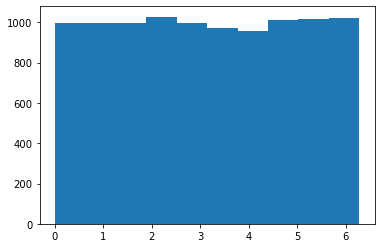

In [110]:
plt.hist(stats.uniform.rvs(loc=0, scale=2*np.pi, size=10_000));